In [29]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load Datasets

In [2]:
dataset_raw = load_dataset(
    "go_emotions",
    "raw",
)
dataset_raw.set_format(type="pandas")
df_raw = dataset_raw["train"][:]

In [3]:
dataset_simple = load_dataset("go_emotions", "simplified")
dataset_simple.set_format(type="pandas")

df_simple_train = dataset_simple["train"][:]
df_simple_val = dataset_simple["validation"][:]
df_simple_test = dataset_simple["test"][:]

df_simple = pd.concat([df_simple_train, df_simple_val, df_simple_test])

# Exploration

In [4]:
df_raw["num_labels"] = df_raw.iloc[:, 9:].sum(axis=1)
df_raw.head(5)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,num_labels
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,1,0,0,1
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,1,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,0,0,0,0,0,0,0,0,1
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
int2label = lambda x: dataset_simple["train"].features["labels"].feature.int2str(x)
# get num_labels as len(labels)
df_simple["num_labels"] = df_simple["labels"].apply(lambda x: len(x))
df_simple["labels_text"] = df_simple["labels"].apply(int2label)
df_simple.head(5)

,text,labels,id,num_labels,labels_text
0,My favourite food is anything I didn't have to...,[27],eebbqej,1,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,1,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,1,[anger]
3,To make her feel threatened,[14],ed7ypvh,1,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,1,[annoyance]


In [6]:
# Neutral Can occur with other emotions in simplified dataset
labels_text_list = df_simple["labels_text"].value_counts().index.tolist()
# check if anyone contais neutral
neutral_with_others = [label for label in labels_text_list if "neutral" in label]
print(len(neutral_with_others))
print(neutral_with_others[:5])

80
[['neutral'], ['approval', 'neutral'], ['annoyance', 'neutral'], ['curiosity', 'neutral'], ['disapproval', 'neutral']]


In [16]:
print(df_simple["num_labels"].value_counts())

num_labels
1    45446
2     8124
3      655
4       37
5        1
Name: count, dtype: int64


## From Raw to Simplified

## One Label (Majority)

In [23]:
def get_example(num_labels):
    simplified_rows = df_simple[df_simple["num_labels"] == num_labels]
    random_id = simplified_rows.sample(1)["id"].values[0]

    raw_rows = df_raw[df_raw["id"] == random_id]
    raw_rows = raw_rows.drop(columns=["num_labels"])

    simplified_rows = df_simple[df_simple["id"] == random_id]

    raw_rows["labels_text"] = raw_rows.apply(
        lambda row: row.index[row == 1].tolist(), axis=1
    )

    raw_rows = raw_rows[["text", "labels_text", "rater_id"]]

    return simplified_rows, raw_rows

In [31]:
simple, raw = get_example(1)
display(simple)
display(raw)

,text,labels,id,num_labels,labels_text
5326,Alllllllllmooooooooost got ittttttttt.,[27],eezgiqe,1,[neutral]


,text,labels_text,rater_id
25806,Alllllllllmooooooooost got ittttttttt.,[neutral],33
47707,Alllllllllmooooooooost got ittttttttt.,[neutral],67
165250,Alllllllllmooooooooost got ittttttttt.,[neutral],21


## Two or more labels
> We assigned three raters to each example. For those
> examples where no raters agree on at least one
> emotion label, we assigned two additional raters.

***GoEmotions Paper***


In [32]:
simple, raw = get_example(2)
display(simple)
display(raw)

,text,labels,id,num_labels,labels_text
7778,"Good for you, [NAME]! You deserved a nice drin...","[0, 17]",ed0tgl6,2,"[admiration, joy]"


,text,labels_text,rater_id
27955,"Good for you, [NAME]! You deserved a nice drin...",[admiration],60
95566,"Good for you, [NAME]! You deserved a nice drin...","[admiration, joy]",37
125245,"Good for you, [NAME]! You deserved a nice drin...","[admiration, joy]",61


In [33]:
simple, raw = get_example(4)
display(simple)
display(raw)

,text,labels,id,num_labels,labels_text
56,I am confused. I don't understand how that rel...,"[1, 6, 7, 24]",efb6lk2,4,"[amusement, confusion, curiosity, remorse]"


,text,labels_text,rater_id
14556,I am confused. I don't understand how that rel...,"[confusion, disapproval, remorse]",2
51323,I am confused. I don't understand how that rel...,"[confusion, curiosity, remorse]",21
86776,I am confused. I don't understand how that rel...,"[amusement, confusion, curiosity]",22
99122,I am confused. I don't understand how that rel...,[curiosity],4
101814,I am confused. I don't understand how that rel...,"[amusement, confusion]",20


# Visualizations

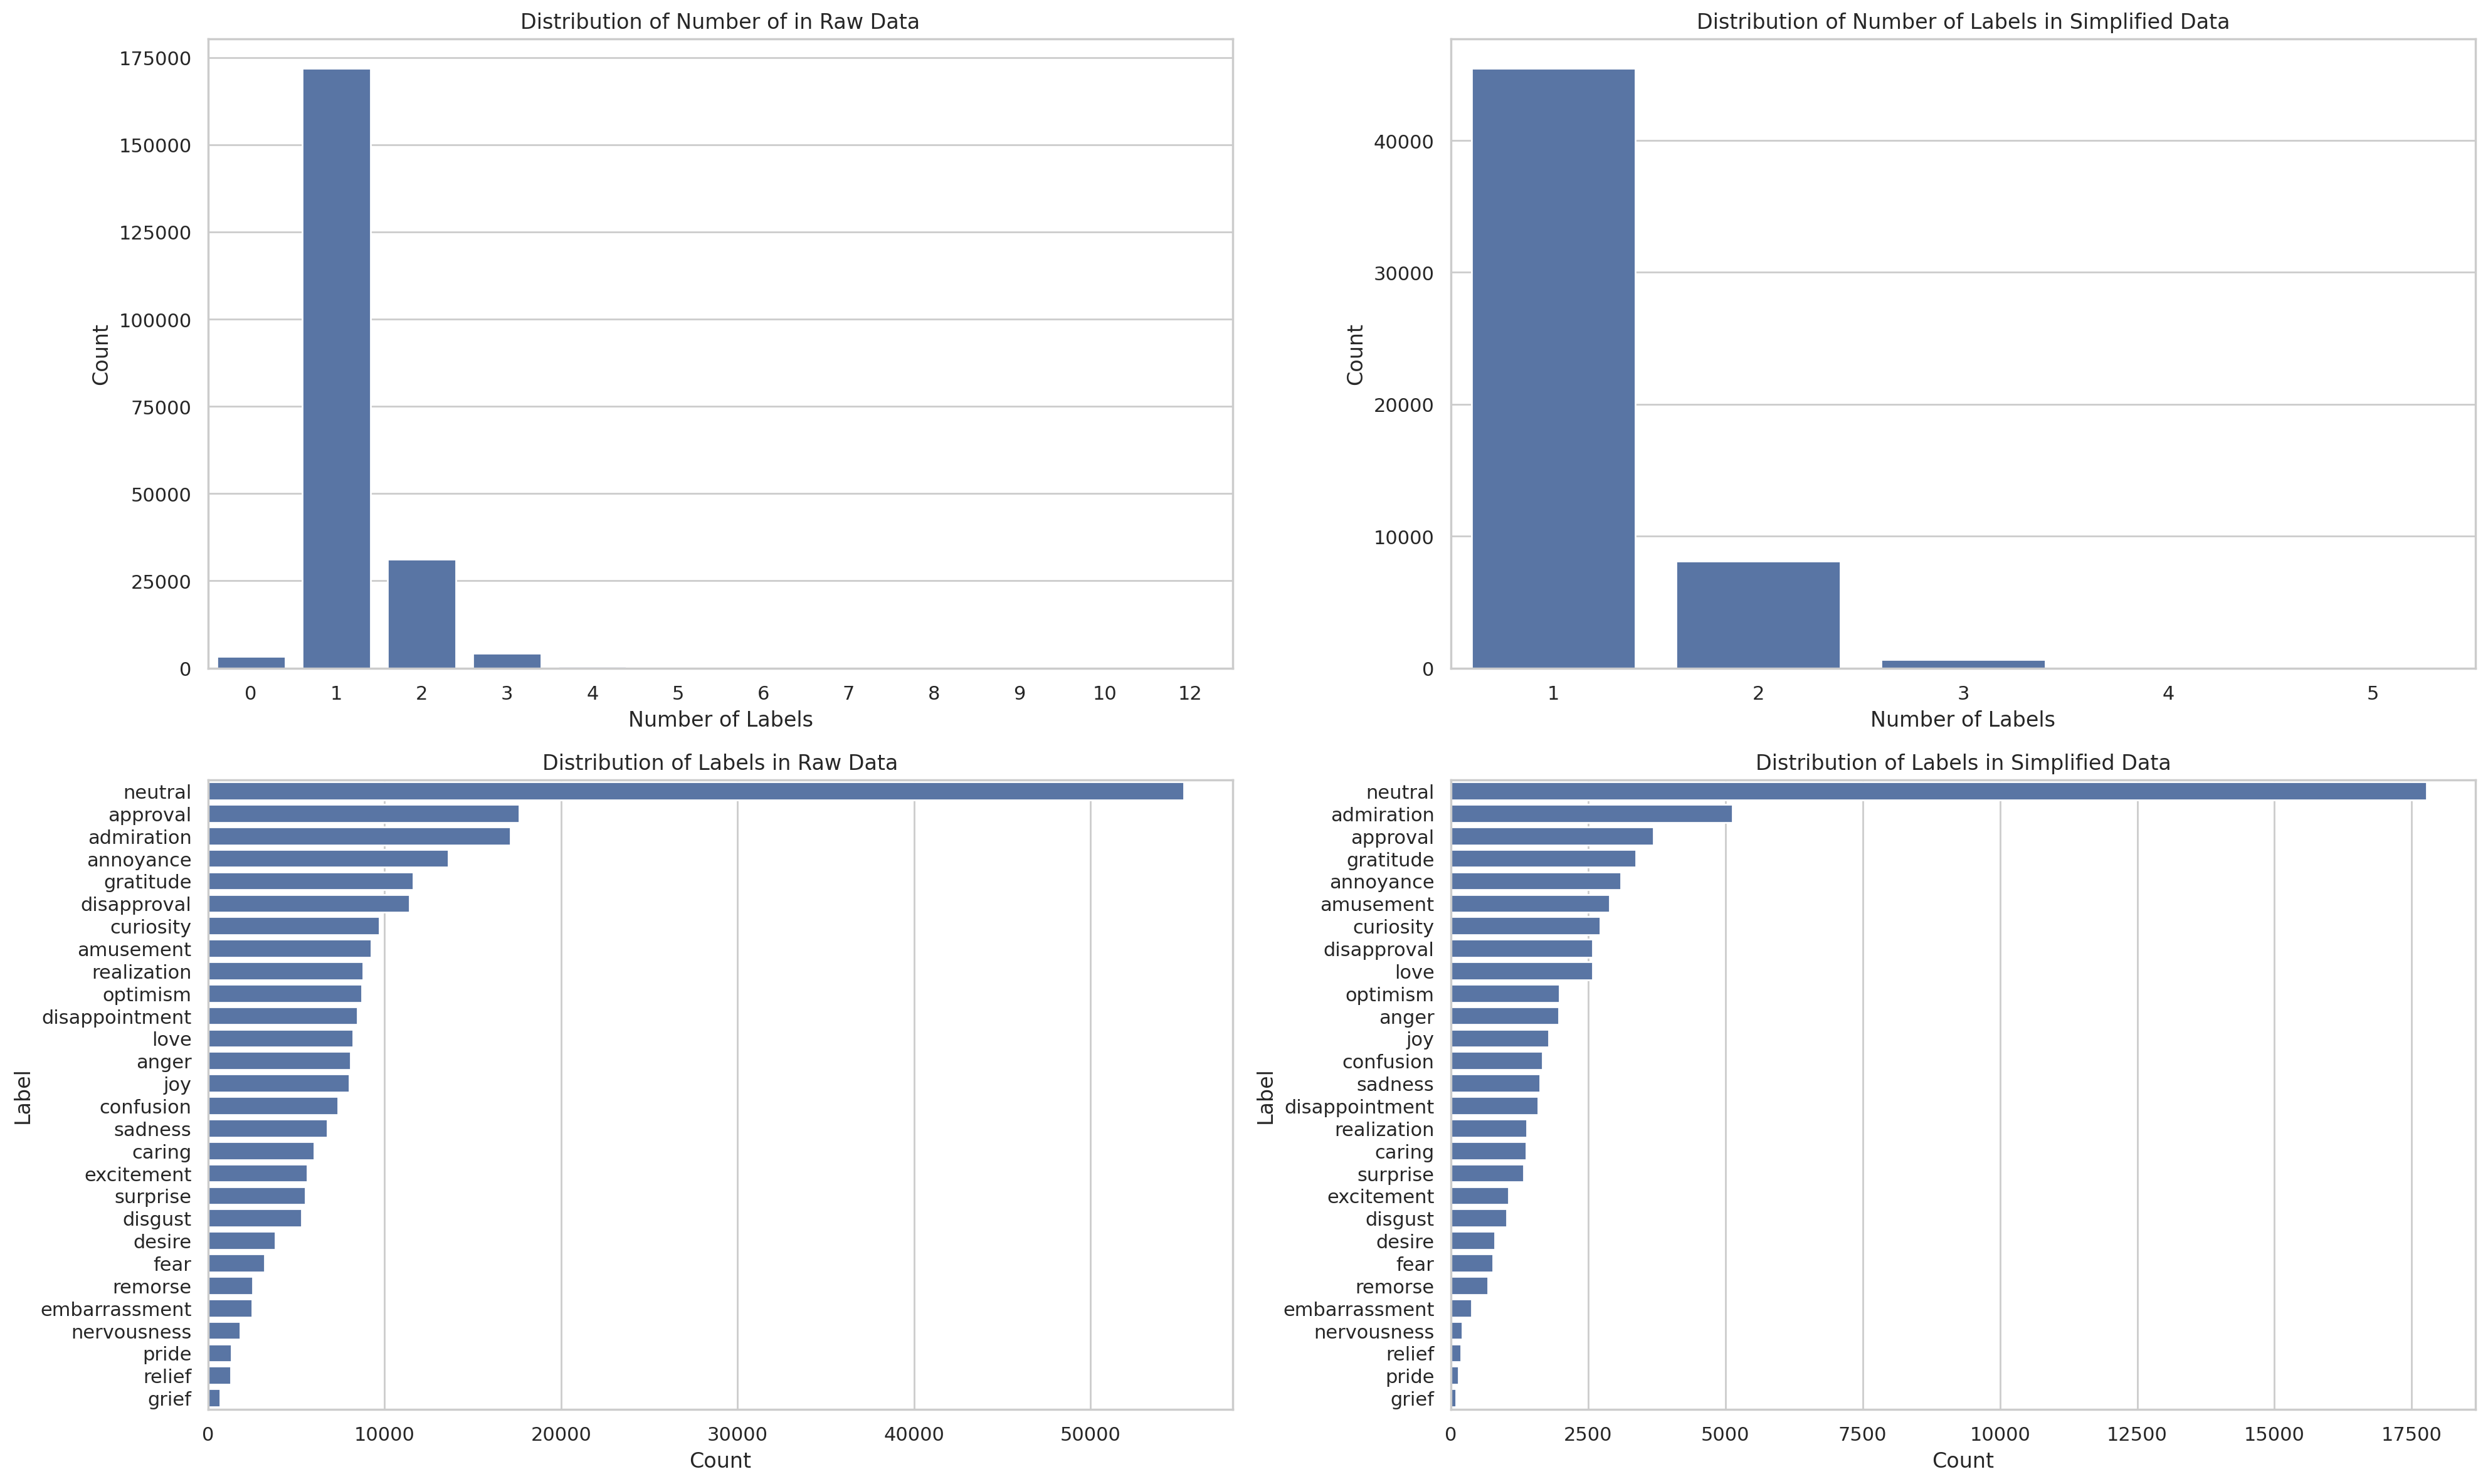

In [13]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 12), dpi=200)

# Plotting the distribution of number of labels in df_raw

label_counts = df_raw["num_labels"].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Number of in Raw Data")
axs[0, 0].set_xlabel("Number of Labels")
axs[0, 0].set_ylabel("Count")

# Plotting the distribution of labels in df_raw
label_counts = df_raw.iloc[:, 9:].sum(axis=0)
label_counts = label_counts.drop("num_labels")
label_counts = label_counts.sort_values(ascending=False)
sns.barplot(x=label_counts.values, y=label_counts.index, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Labels in Raw Data")
axs[1, 0].set_xlabel("Count")
axs[1, 0].set_ylabel("Label")

# Plotting the distribution of number of labels in df_simple
label_counts = df_simple["num_labels"].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Number of Labels in Simplified Data")
axs[0, 1].set_xlabel("Number of Labels")
axs[0, 1].set_ylabel("Count")

# Plotting the distribution of labels in df_simple
label_counts = df_simple["labels_text"].explode().value_counts()
sns.barplot(x=label_counts.values, y=label_counts.index, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Labels in Simplified Data")
axs[1, 1].set_xlabel("Count")
axs[1, 1].set_ylabel("Label")

plt.tight_layout()
plt.show()

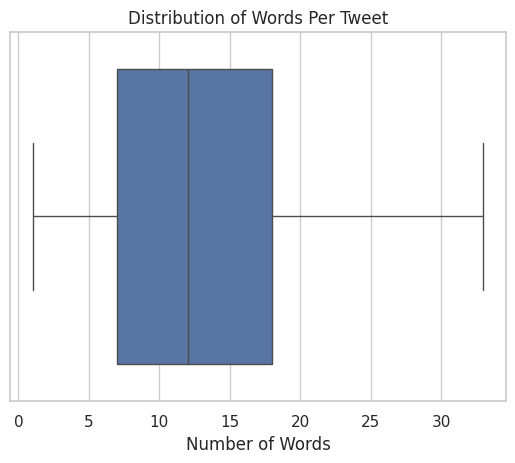

In [14]:
words_per_tweet = df_simple["text"].apply(lambda x: len(x.split()))

# Creating a boxplot for the number of words in each tweet
fig, ax = plt.subplots()
sns.boxplot(x=words_per_tweet, ax=ax)

ax.set_title("Distribution of Words Per Tweet")
ax.set_xlabel("Number of Words")
plt.show()